In [304]:
import os, gc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.plotly as py
init_notebook_mode(connected=True)
%matplotlib inline

In [68]:
countryCode_toName = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Phillipines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "United Kingdom",
    216: "United States",
}

In [ ]:
def number_of_cusines(temp):
    #print (temp)
    return len(temp.split())

In [290]:
data = pd.read_csv("data/zomato.csv", encoding = "ISO-8859-1")
data['Country'] = data['Country Code'].apply(lambda x: countryCode_toName[x])
data.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3907,18449796,Big Fat Sandwich,1,New Delhi,"A-15A Front, Hauz Khas, New Delhi",Hauz Khas,"Hauz Khas, New Delhi",77.203932,28.550327,American,...,No,No,No,No,2,2.9,Orange,Average,21,India
6709,312476,Lights Camera Action - Air Bar,1,New Delhi,"J-2/6 B, 3rd Floor, BK Dutt Market, Rajouri Ga...",Rajouri Garden,"Rajouri Garden, New Delhi",77.119833,28.647793,"North Indian, Continental",...,No,No,No,No,3,4.4,Green,Very Good,1636,India
9254,18246202,VNS Live Studio,1,Varanasi,"Hotel Varuna Ground Floor, 22 Gulab Bagh, Sigr...",Sigra,"Sigra, Varanasi",82.991694,25.318345,"Chinese, North Indian",...,No,No,No,No,1,3.5,Yellow,Good,109,India
1383,4171,Burger Hut,1,Gurgaon,"U-6/50, Near Yashwant Department Store, DLF Ph...",DLF Phase 3,"DLF Phase 3, Gurgaon",77.094263,28.492337,"Burger, Fast Food, Chinese",...,No,Yes,No,No,1,3.6,Yellow,Good,319,India
8015,18455876,OCD - Online Cake Delivery,1,New Delhi,"59/2, Yusuf Sarai, New Delhi",Yusuf Sarai,"Yusuf Sarai, New Delhi",77.206352,28.556623,"Bakery, Desserts",...,No,No,No,No,1,0.0,White,Not rated,1,India


In [108]:
labels = list(data.Country.value_counts().index)
values = list(data.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

In [170]:
data.Cuisines.fillna("zero", inplace=True)
data['Number of Cusines Offered'] = data.Cuisines.apply(number_of_cusines)

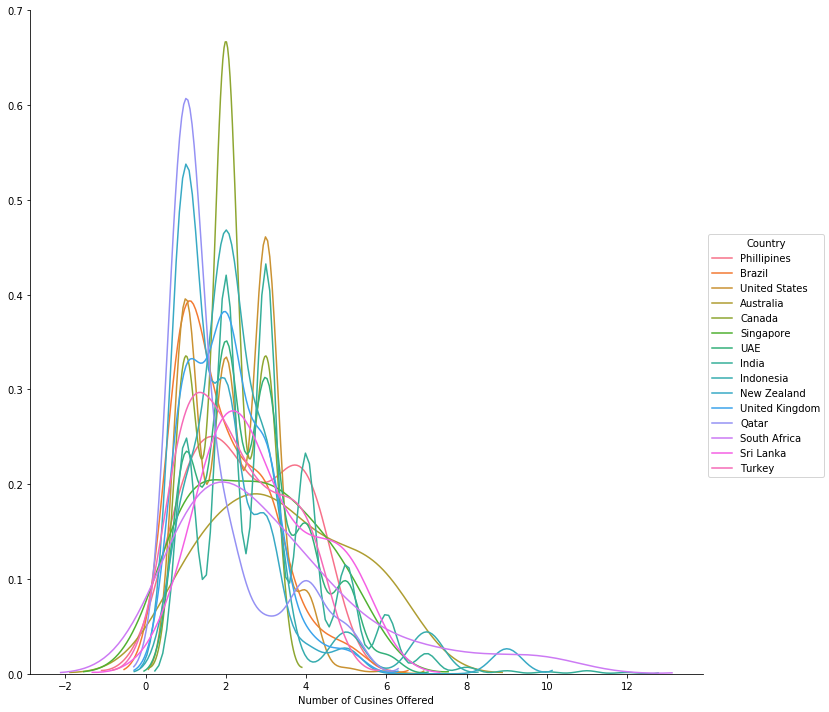

In [174]:
g = sns.FacetGrid(data, hue='Country', size=10)
g.map(sns.kdeplot, "Number of Cusines Offered")
g.add_legend()

In [171]:
data_india = data.loc[data.Country == "India"]

In [185]:
data_india.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Lucknow           21
Guwahati          21
Ahmedabad         21
Amritsar          21
Bhubaneshwar      21
Mangalore         20
Pune              20
Kanpur            20
Varanasi          20
Surat             20
Mysore            20
Allahabad         20
Bhopal            20
Mumbai            20
Ludhiana          20
Agra              20
Ranchi            20
Vadodara          20
Bangalore         20
Vizag             20
Coimbatore        20
Kochi             20
Dehradun          20
Chennai           20
Indore            20
Jaipur            20
Patna             20
Aurangabad        20
Nashik            20
Kolkata           20
Nagpur            20
Puducherry        20
Goa               20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [229]:
ncr_data = data_india.loc[data.City.isin(['New Delhi','Gurgaon','Noida'])]

In [283]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}
breakfast = ncr_data.loc[ncr_data['Restaurant Name'].isin(types['Breakfast and Coffee'])]
american = ncr_data.loc[ncr_data['Restaurant Name'].isin(types['American'])]
ice_cream = ncr_data.loc[ncr_data['Restaurant Name'].isin(types['Ice Creams and Shakes'])]

In [328]:
breakfast_rating = breakfast[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = breakfast_rating['Restaurant Name']
y_ax = breakfast_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(159, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none"
          )
]

layout = go.Layout(title = "Average Ratings: Breakfast & Coffee",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Cafe",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [397]:
breakfast_locations = breakfast[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
breakfast_locations['Text'] = breakfast_locations['Restaurant Name'] + "<br>Rating: "+breakfast_locations['Rating text']+" ("+breakfast_locations['Aggregate rating'].astype(str)+")" + "<br>" + breakfast_locations['Locality Verbose']
mapbox_access_token = 'pk.eyJ1Ijoic29taW53IiwiYSI6ImNqajN4cWZ4ODFlaHQzcW52ZzlvN2s5NG4ifQ.WtdnzCqgcSH0XzdMhwgyHw'
#breakfast_locations.sample(5)

In [414]:
data = [
    go.Scattermapbox(lat= breakfast_locations.Latitude,
                    lon = breakfast_locations.Longitude,
                    text = breakfast_locations['Restaurant Name'],
                    opacity = 0.8,
                    marker = dict(symbol = "cafe",
                                  size = 10,
                                 color="rgb(8, 48, 107)",
                                 opacity = 0.9,), 
                    hovertext = breakfast_locations['Text'], 
                    hoverlabel = dict(font = dict(size=15),),
                    mode = "markers+text",
                     
                    )
]

layout = go.Layout(autosize=True,
                   title = "Breakfast & Coffee in Delhi/Gurgaon & Neighbouring Areas<br>(Associated with Zomato)",
                   hovermode='closest',
                  mapbox = dict(
                  accesstoken = mapbox_access_token,
                  center = dict(lat = 28.63,
                               lon = 77.21,),
                  pitch = 0,
                zoom = 10,
                  ),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="donut")

In [420]:
lunch_rating = american[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = lunch_rating['Restaurant Name']
y_ax = lunch_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(202, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none",
          )
]

layout = go.Layout(title = "Average Ratings: Lunch",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Restaurant",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [421]:
lunch_locations = american[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
lunch_locations['Text'] = lunch_locations['Restaurant Name'] + "<br>Rating: "+lunch_locations['Rating text']+" ("+lunch_locations['Aggregate rating'].astype(str)+")" + "<br>" + lunch_locations['Locality Verbose']

In [423]:
data = [
    go.Scattermapbox(lat= lunch_locations.Latitude,
                    lon = lunch_locations.Longitude,
                    text = lunch_locations['Restaurant Name'],
                    opacity = 0.8,
                    marker = dict(symbol = "restaurant",
                                  size = 10,
                                 color="rgb(8, 48, 107)", #does not work if the symbol isn't a circle
                                 opacity = 0.9,), 
                    hovertext = lunch_locations['Text'], 
                    hoverlabel = dict(font = dict(size=15),),
                    mode = "markers+text",
                     
                    )
]

layout = go.Layout(autosize=True,
                   title = "American Fast Food in Delhi/Gurgaon & Neighbouring Areas<br>(Associated with Zomato)",
                   hovermode='closest',
                  mapbox = dict(
                  accesstoken = mapbox_access_token,
                  center = dict(lat = 28.63,
                               lon = 77.21,),
                  pitch = 0,
                zoom = 10,
                  ),
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="donut")